<a href="https://colab.research.google.com/github/pauloalexx/Python_study/blob/main/Bibliotecas_Aula5_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AULA 5 - Análise de dados com o Pandas I**

---

> Identificando os valores nulos, removendo duplicatas e agrupando dados...

```
isnull() | notnull()

notna() | dropna()

drop_duplicates()

groupby()

```





> **SITUAÇÃO PROBLEMA**

Vamos supor que você seja dono de um banco em Taiwan que oferta serviço de crédito. Você tem em mãos uma tabela em excel com dados dos clientes que contrataram o serviço de crédito. 

`Objetivo`: produzir e apresentar um panorama consolidado sobre a situação dos clientes no banco para o restante da empresa.

**PASSO 4: ORGANIZAR E TRATAR OS DADOS:**

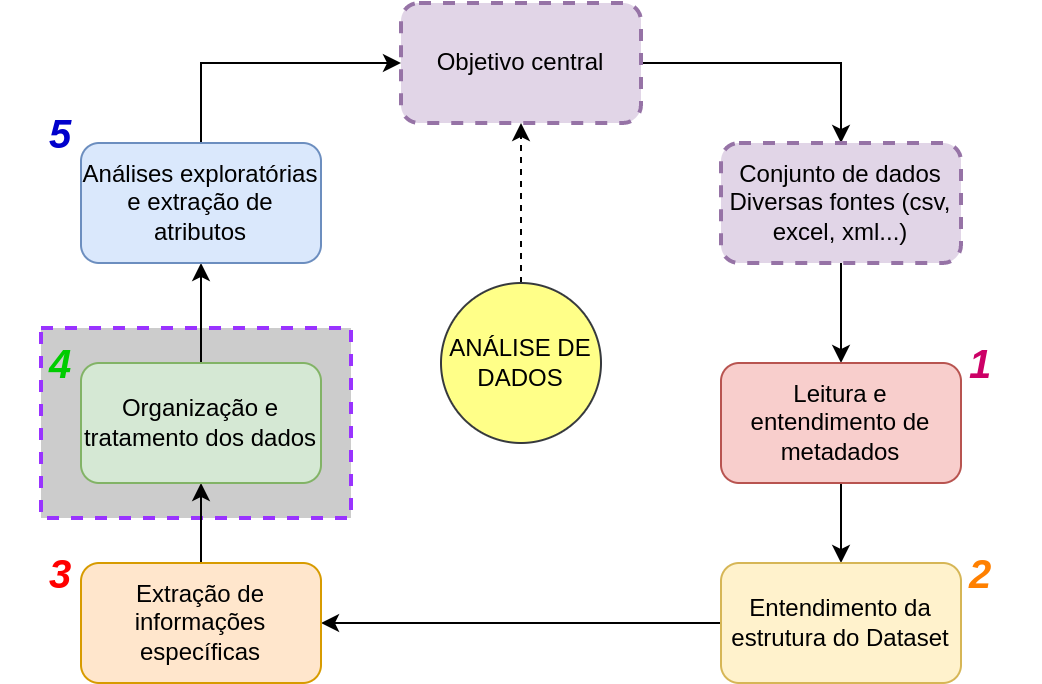

In [ ]:
# Importando a biblioteca 

import pandas as pd

In [ ]:
# Lendo dados tabulares

credit = pd.read_csv('/content/credit_card_clients_2.csv')

In [ ]:
# Identificando os valores NÃO NULOS

credit.isnull() # retorna boleano que mostra os valores nulos como True
credit.notnull() # retorna boleano que mostra os valores nulos como False

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30012,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30013,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30014,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30015,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30012,30013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30013,30014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30014,30015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30015,30016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Identificando os valores NULOS

credit.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30012,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
30013,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
30014,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
30015,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
# Somando os valores nulos

credit.isnull().sum()

ID                             0
LIMIT_BAL                     14
SEX                           14
EDUCATION                     14
MARRIAGE                      14
AGE                           14
PAY_0                         14
PAY_2                         14
PAY_3                         14
PAY_4                         14
PAY_5                         14
PAY_6                         14
BILL_AMT1                     14
BILL_AMT2                     14
BILL_AMT3                     14
BILL_AMT4                     14
BILL_AMT5                     14
BILL_AMT6                     14
PAY_AMT1                      14
PAY_AMT2                      14
PAY_AMT3                      14
PAY_AMT4                      14
PAY_AMT5                      14
PAY_AMT6                      14
default payment next month    14
dtype: int64

In [ ]:
# Filtrando os valores nulos

credit.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30012,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
30013,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
30014,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
30015,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
# Excluindo as linhas com valores nulos

credit2 = credit[credit['ID'].notna()]
credit2.loc[29999:30016]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29999,30000,50000.0,1.0,2.0,1.0,46.0,0.0,0.0,0.0,0.0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1.0
30000,30001,44000.0,2.0,1.0,2.0,33.0,0.0,0.0,0.0,0.0,...,36535.0,32428.0,15323.0,2056.0,1800.0,1120.0,1000.0,1000.0,1000.0,1.0
30001,30002,43300.0,1.0,2.0,1.0,36.0,0.0,0.0,0.0,0.0,...,36535.0,32428.0,15343.0,2034.0,1800.0,1650.0,1000.0,1000.0,2000.0,1.0
30002,30003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30003,30004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30004,30005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30005,30006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30006,30007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30007,30008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30008,30009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Outra forma de excluir valores nulos

credit3 = credit.dropna(how='all')
credit3

NameError: ignored

`any`: Se algum valor NA estiver presente, elimine essa linha ou coluna.

`all`: Se todos os valores forem NA, elimine essa linha ou coluna.

In [ ]:
# Removendo as duplicatas
# função -> .drop_duplicates()
credit.drop_duplicates(subset ="ID",keep = 'first', inplace = True)

- **Observação**

O método `drop_duplicates()` ajuda a remover duplicatas do DataFrame. Recebe os seguintes parâmetros:

`subset`: especifica uma coluna ou lista de rótulos de colunas. Valor padrão `None`.

`keep`: serve para controlar o que considerar como valor duplicado:

  - `first`: descarta duplicatas, exceto a primeira ocorrência.
  - `last`: descarta duplicatas, exceto a última ocorrência.
  - `False`: elimina todas as duplicatas.

`inplace`: valores booleanos, remove as linhas como duplicatas se `True`.



> Agrupando dados


função .groupby

Parâmetros:


1.   Coluna ('Nome escolhido para ser filtrado')
2.   Soma (.sum()) ou média (.mean())
3.   reset_index() -> Traz novamente os indices para o agrupamento





In [ ]:
# Agrupando dados

credit_group = credit.groupby(['SEX']).mean().reset_index()
credit_group

,SEX,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,14804.048532,163509.713180,1.839263,1.572041,36.519388,0.063252,-0.029187,-0.068551,-0.133821,...,44999.619060,41586.734545,40099.692825,5668.231559,5960.370174,5412.189587,4868.852553,4830.504836,5275.921188,0.241736
1,2.0,15131.103075,170079.500911,1.862198,1.538619,34.806769,-0.069177,-0.202396,-0.230277,-0.277646,...,42122.291614,39473.427814,38063.171755,5660.128085,5894.973997,5102.837354,4797.577320,4778.543422,5175.434771,0.207807
2,29999.0,30017.000000,30018.000000,30000.000000,5000.000000,0.000000,1.000000,2.000000,1.000000,46.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,49764.000000,36535.000000,32428.000000,15313.000000,2078.000000
